In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [33]:

# Define reusable functions for data analysis
def load_csv_file(file_path):
    """Load CSV file and return DataFrame"""
    expanded_path = os.path.expanduser(file_path)
    print(f"Loading data from: {expanded_path}")
    try:
        df = pd.read_csv(expanded_path)
        print(f"Data shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        return df
    except FileNotFoundError:
        print(f"Error: File not found: {expanded_path}")
        return None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def print_statistics(data, label="Data"):
    """Print statistics for a data series"""
    print(f"\n{label} Statistics:")
    print(f"Count: {data.count()}")
    print(f"Mean: {data.mean():.4f}")
    print(f"Std: {data.std():.4f}")
    print(f"Min: {data.min():.4f}")
    print(f"Max: {data.max():.4f}")

def create_histogram(data, title="Distribution", bins=50, color='blue', alpha=0.7, figsize=(10, 6)):
    """Create a histogram with statistics box"""
    plt.figure(figsize=figsize)
    plt.hist(data.dropna(), bins=bins, alpha=alpha, edgecolor='black', linewidth=0.5, color=color)
    plt.xlabel('Relaxed eHull (eV/atom)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add statistics text box
    stats_text = f'Count: {data.count()}\nMean: {data.mean():.4f}\nStd: {data.std():.4f}'
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def create_comparative_histogram(datasets, title="Comparison of Relaxed eHull Distributions", 
                               figsize=(12, 8), bins=50, alpha=0.6):
    """Create a comparative histogram with multiple datasets"""
    plt.figure(figsize=figsize)
    
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    
    # Plot histograms for each dataset
    for i, (name, data_dict) in enumerate(datasets.items()):
        color = colors[i % len(colors)]
        plt.hist(data_dict['ehull_data'].dropna(), bins=bins, alpha=alpha, 
                label=name, edgecolor='black', linewidth=0.5, color=color)
    
    plt.xlabel('Relaxed eHull (eV/atom)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add statistics text boxes
    y_position = 0.98
    y_step = 0.23
    box_colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray']
    
    for i, (name, data_dict) in enumerate(datasets.items()):
        if i >= len(box_colors):
            break
        stats_text = f'{name}:\nCount: {data_dict["ehull_data"].count()}\nMean: {data_dict["ehull_data"].mean():.4f}\nStd: {data_dict["ehull_data"].std():.4f}'
        
        plt.text(0.02, y_position, stats_text, transform=plt.gca().transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', 
                facecolor=box_colors[i % len(box_colors)], alpha=0.8))
        y_position -= y_step
    
    plt.tight_layout()
    plt.show()

# Load the CSV file
file_path = "~/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/relaxed_structures_ehull.csv"

print(f"Loading data from: {file_path}")

Loading data from: ~/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/relaxed_structures_ehull.csv


In [34]:
# Load the data using the function
df = load_csv_file(file_path)

if df is not None:
    ehull_data = df['relaxed_ehull']
    print_statistics(ehull_data, "Relaxed eHull")

Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/relaxed_structures_ehull.csv
Data shape: (100, 6)
Columns: ['initial_energy', 'final_energy', 'relaxed_cif', 'formula', 'unrelaxed_ehull', 'relaxed_ehull']

Relaxed eHull Statistics:
Count: 100
Mean: 0.0951
Std: 0.2151
Min: -0.5706
Max: 0.6645


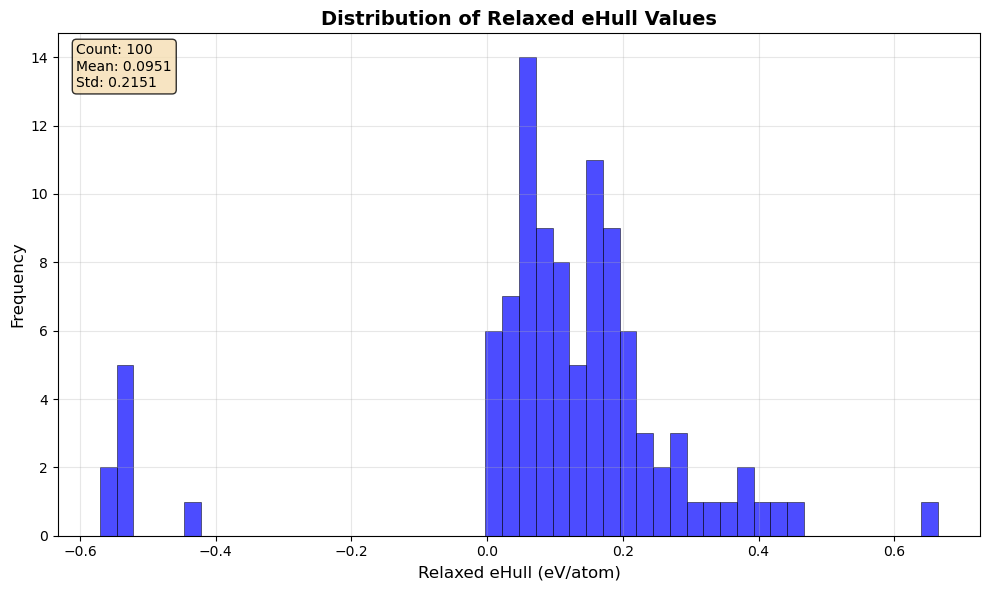

In [35]:
# Create the histogram using the reusable function
if df is not None:
    create_histogram(ehull_data, title='Distribution of Relaxed eHull Values')

In [71]:
# Load both CSV files for comparison
base_path = "~/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1"

file_paths = {
    'C_1900': f"{base_path}/relaxed_structures_C_1900_ehull.csv",
    'C_100': f"{base_path}/relaxed_structures_C_100_ehull.csv"
}

# Load data for both files
datasets = {}
for name, path in file_paths.items():
    df = load_csv_file(path)
    if df is not None:
        datasets[name] = {
            'df': df,
            'ehull_data': df['relaxed_ehull']
        }
        print_statistics(datasets[name]['ehull_data'], name)


Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/relaxed_structures_C_1900_ehull.csv
Data shape: (1000, 6)
Columns: ['initial_energy', 'final_energy', 'relaxed_cif', 'formula', 'unrelaxed_ehull', 'relaxed_ehull']

C_1900 Statistics:
Count: 998
Mean: 5.6647
Std: 2.1340
Min: 0.1780
Max: 11.6677
Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/relaxed_structures_C_100_ehull.csv
Data shape: (1000, 6)
Columns: ['initial_energy', 'final_energy', 'relaxed_cif', 'formula', 'unrelaxed_ehull', 'relaxed_ehull']

C_100 Statistics:
Count: 994
Mean: 5.9418
Std: 1.9511
Min: 0.3770
Max: 12.1852


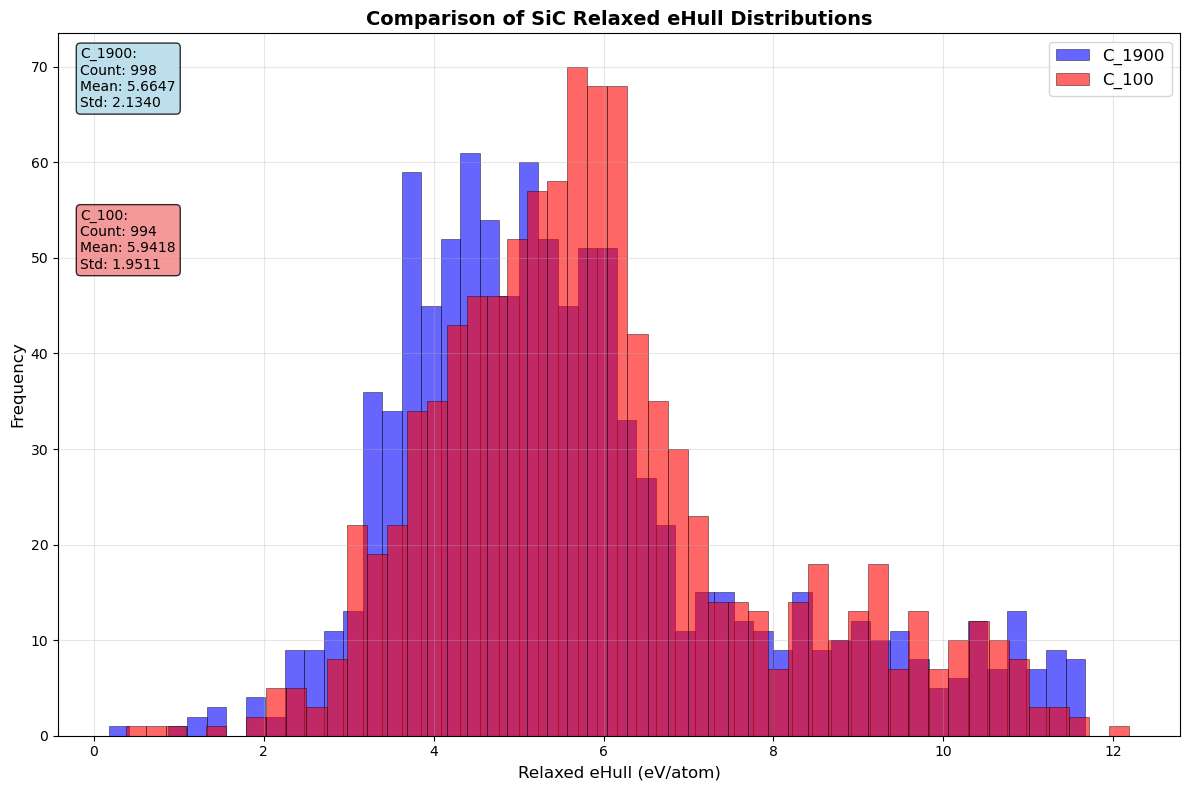

In [72]:
# Create the comparative histogram
if len(datasets) > 1:
    create_comparative_histogram(datasets, title="Comparison of SiC Relaxed eHull Distributions")
else:
    print("Need at least 2 datasets for comparison")


In [68]:
# Load and plot training logs
def load_training_logs(file_path):
    """Load training log file and return DataFrame"""
    expanded_path = os.path.expanduser(file_path)
    print(f"Loading training logs from: {expanded_path}")
    
    try:
        # Read the log file
        with open(expanded_path, 'r') as f:
            lines = f.readlines()
        
        # Find the header line
        header_line = None
        data_start_idx = 0
        
        for i, line in enumerate(lines):
            if 'epoch' in line and 't_loss' in line and 'v_loss' in line:
                header_line = line.strip()
                data_start_idx = i + 1
                break
        
        if header_line is None:
            print("Could not find header line in log file")
            return None
        
        print(f"Found header: {header_line}")
        
        # Parse header to get column names
        columns = header_line.split()
        print(f"Columns: {columns}")
        
        # Parse data lines
        data_rows = []
        for line in lines[data_start_idx:]:
            line = line.strip()
            if line and not line.startswith('#'):  # Skip empty lines and comments
                try:
                    values = line.split()
                    if len(values) == len(columns):
                        # Convert to float, handling any non-numeric values
                        row_data = []
                        for val in values:
                            try:
                                row_data.append(float(val))
                            except ValueError:
                                row_data.append(np.nan)
                        data_rows.append(row_data)
                except:
                    continue
        
        if not data_rows:
            print("No valid data rows found")
            return None
        
        # Create DataFrame
        df = pd.DataFrame(data_rows, columns=columns)
        print(f"Loaded {len(df)} rows of training data")
        print(f"Data shape: {df.shape}")
        
        return df
        
    except FileNotFoundError:
        print(f"Error: File not found: {expanded_path}")
        return None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def plot_training_losses(df, figsize=(8, 20)):
    """Plot training and validation losses in subfigures arranged vertically"""
    if df is None:
        print("No data to plot")
        return
    
    # Define loss pairs (training, validation)
    loss_pairs = [
        ('t_loss', 'v_loss', 'Total Loss'),
        ('t_loss_g', 'v_loss_g', 'G Loss'),
        ('t_loss_w', 'v_loss_w', 'W Loss'),
        ('t_loss_a', 'v_loss_a', 'A Loss'),
        ('t_loss_xyz', 'v_loss_xyz', 'XYZ Loss'),
        ('t_loss_l', 'v_loss_l', 'L Loss')
    ]
    
    # Create subplots in a single column
    n_pairs = len(loss_pairs)
    n_cols = 1
    n_rows = n_pairs
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle case where there's only one subplot
    if n_rows == 1:
        axes = [axes]
    
    # Plot each loss pair
    for i, (train_col, val_col, title) in enumerate(loss_pairs):
        ax = axes[i]
        
        if train_col in df.columns and val_col in df.columns:
            # Plot training and validation losses
            ax.plot(df['epoch'], df[train_col], 'o-', label='Training', color='blue', alpha=0.7)
            ax.plot(df['epoch'], df[val_col], 's-', label='Validation', color='red', alpha=0.7)
            
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(title)
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_xscale('log')  # Set log scale for x-axis
            
            # Add some statistics
            train_min = df[train_col].min()
            val_min = df[val_col].min()
            ax.text(0.02, 0.98, f'Train min: {train_min:.4f} \n Val min: {val_min:.4f}', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            ax.text(0.5, 0.5, f'Columns {train_col}, {val_col} not found', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(title)
    
    plt.tight_layout()
    plt.show()

# Load the training log file
log_file_path = "~/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/data.txt"

# Load the data
training_df = load_training_logs(log_file_path)


Loading training logs from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/data.txt
Found header: epoch t_loss v_loss t_loss_g v_loss_g t_loss_w v_loss_w t_loss_a v_loss_a t_loss_xyz v_loss_xyz t_loss_l v_loss_l
Columns: ['epoch', 't_loss', 'v_loss', 't_loss_g', 'v_loss_g', 't_loss_w', 'v_loss_w', 't_loss_a', 'v_loss_a', 't_loss_xyz', 'v_loss_xyz', 't_loss_l', 'v_loss_l']
Loaded 19 rows of training data
Data shape: (19, 13)


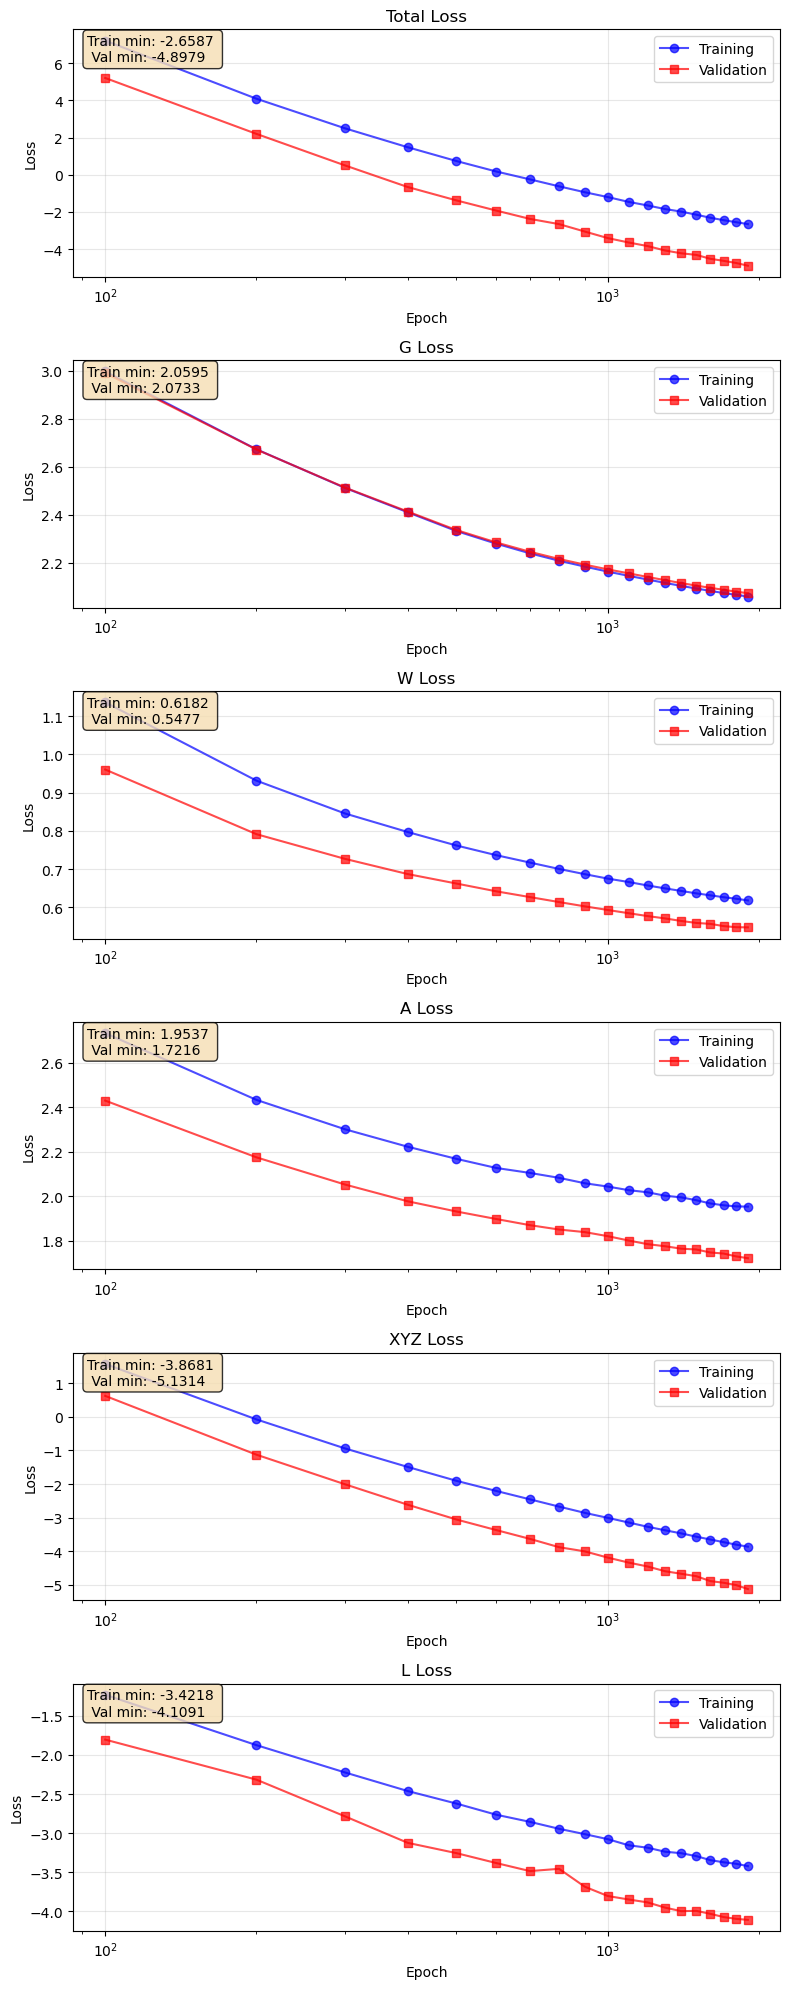

\n=== Training Data Summary ===
Total epochs: 19
Epoch range: 100.0 - 1900.0
\n=== Final Losses ===
t_loss: -2.658701
v_loss: -4.897868
t_loss_g: 2.059478
v_loss_g: 2.073348
t_loss_w: 0.618152
v_loss_w: 0.547680
t_loss_a: 1.953651
v_loss_a: 1.721638
t_loss_xyz: -3.868144
v_loss_xyz: -5.131426
t_loss_l: -3.421838
v_loss_l: -4.109107


In [69]:
# Plot the training losses
if training_df is not None:
    plot_training_losses(training_df)
    
    # Display basic statistics
    print("\\n=== Training Data Summary ===")
    print(f"Total epochs: {len(training_df)}")
    print(f"Epoch range: {training_df['epoch'].min()} - {training_df['epoch'].max()}")
    
    # Show final losses
    print("\\n=== Final Losses ===")
    final_row = training_df.iloc[-1]
    for col in training_df.columns:
        if col != 'epoch':
            print(f"{col}: {final_row[col]:.6f}")
else:
    print("Failed to load training data")
